# 前言
- 为了使神经网络能进行学习（训练），将导入损失函数这一指标。而学习（训练）的目的就是以该损失函数为基准，找出能使它的值达到最小的权重参数

## 识别数字5的算法

- 一种方案是，先从图像中提取特征量，再用机器学习技术学习这些特征量的模式。这里所说的“特征量”是指可以从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。图像的特征量通常表示为向量的形式。在计算机视觉领域，常用的特征量包括SIFT、SURF和HOG等。使用这些特征量将图像数据转换为向量，然后对转换后的向量使用机器学习中的SVM、KNN等分类器进行学习。


- 方法总结：
    - 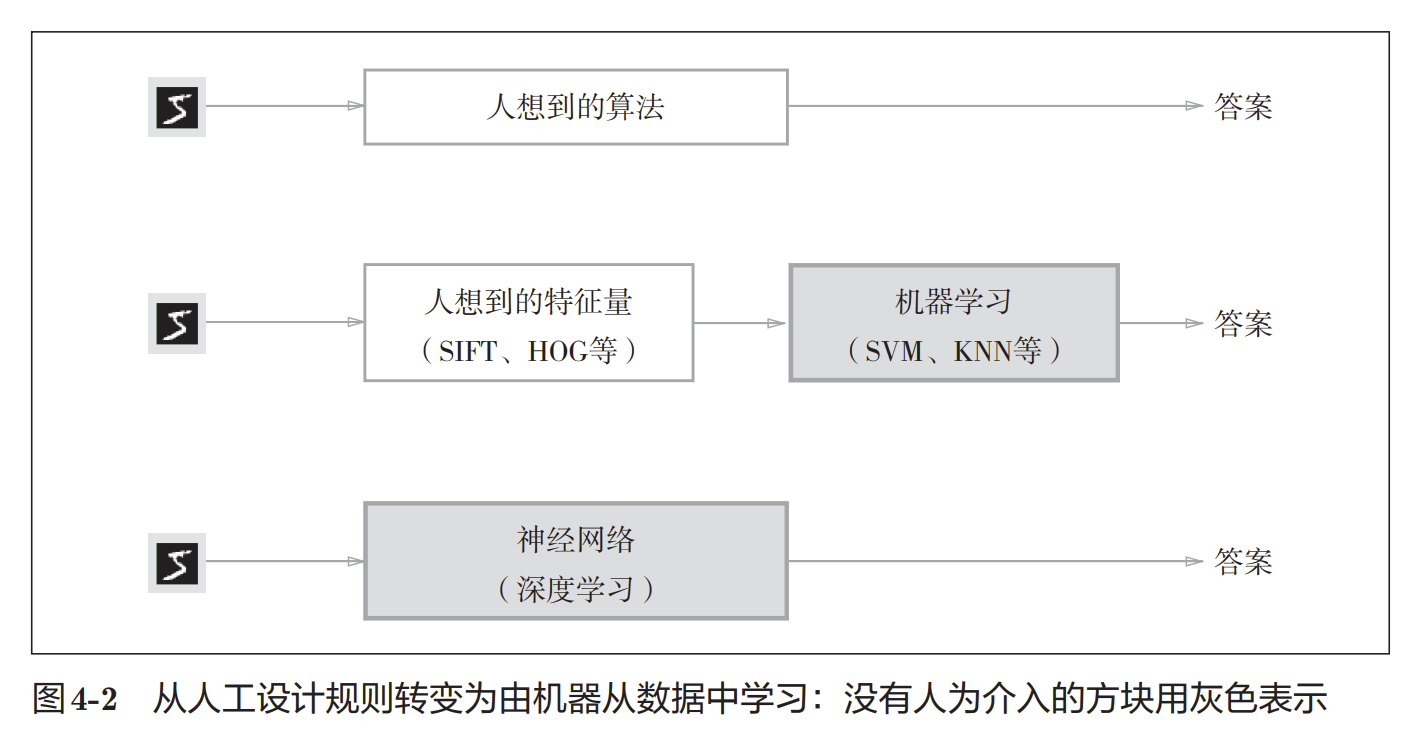
    - 深度学习有时也称为端到端机器学习（end-to-end machinelearning）。这里所说的端到端是指从一端到另一端的意思，也就是从原始数据（输入）中获得目标结果（输出）的意思。


# 训练数据和测试数据
- 首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力
- 为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以称为监督数据。
- **泛化能力**是指处理未被观察过的数据（不包含在训练数据中的数据）的能力。获得泛化能力是机器学习的最终目标。比如，在识别手写数字的问题中，泛化能力可能会被用在自动读取明信片的邮政编码的系统上
- 仅仅用一个数据集去学习和评价参数，是无法进行正确评价的。这样会导致可以顺利地处理某个数据集，但无法处理其他数据集的情况。顺便说一下，只对某个数据集过度拟合的状态称为**过拟合（over fitting）**。避免过拟合也是机器学习的一个重要课题

# 损失函数

- 神经网络的学习通过某个指标表示现在的状态。然后，以这个指标为基准，寻找最优权重参数。神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。
- **损失函数是表示神经网络性能的“恶劣程度”的指标**，即当前的神经网络对监督数据在多大程度上不拟合，在多大程度上不一致。
- 以“性能的恶劣程度”为指标可能会使人感到不太自然，**但是如果给损失函数乘上一个负值**，就可以解释为“在多大程度上不坏”，即“性能有多好”。并且，“使性能的恶劣程度达到最小”和“使性能的优良程度达到最大”是等价的，不管是用“恶劣程度”还是“优良程度”，做的事情本质上都是一样的

## 均方误差
- 均方误差（mean squared error）
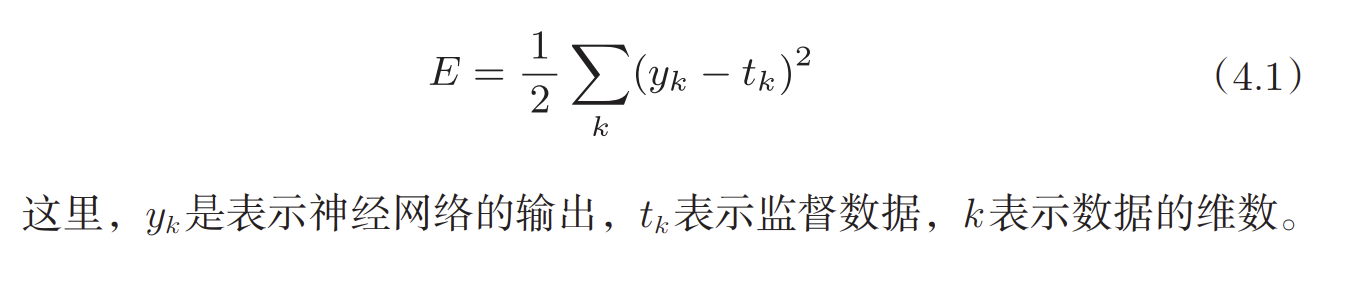

- 均方误差会计算神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和

- 将正确解标签表示为1，其他标签表示为0的表示方法称为one-hot表示。


In [3]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


In [8]:
# t是监督数据，将正确解标签设为1，其他均设为0
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 数组元素的索引从第一个开始依次对应数字“0”“1”“2”…… 这里，
#神经网络的输出y是softmax函数的输出。由于softmax函数的输出可以理解为概率，
#因此上例表示“0”的概率是0.1，“1”的概率是0.05，“2”的概率是0.6等
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.2725

In [9]:
y1 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y1), np.array(t))

0.5975

- 这里举了两个例子。第一个例子中，正确解是“2”，神经网络的输出的最大值是“2”；第二个例子中，正确解是“2”，神经网络的输出的最大值是“7”。如实验结果所示，我们发现第一个例子的损失函数的值更小，和监督数据之间的误差较小。也就是说，均方误差显示第一个例子的输出结果与监督数据更加吻合

# 交叉熵误差

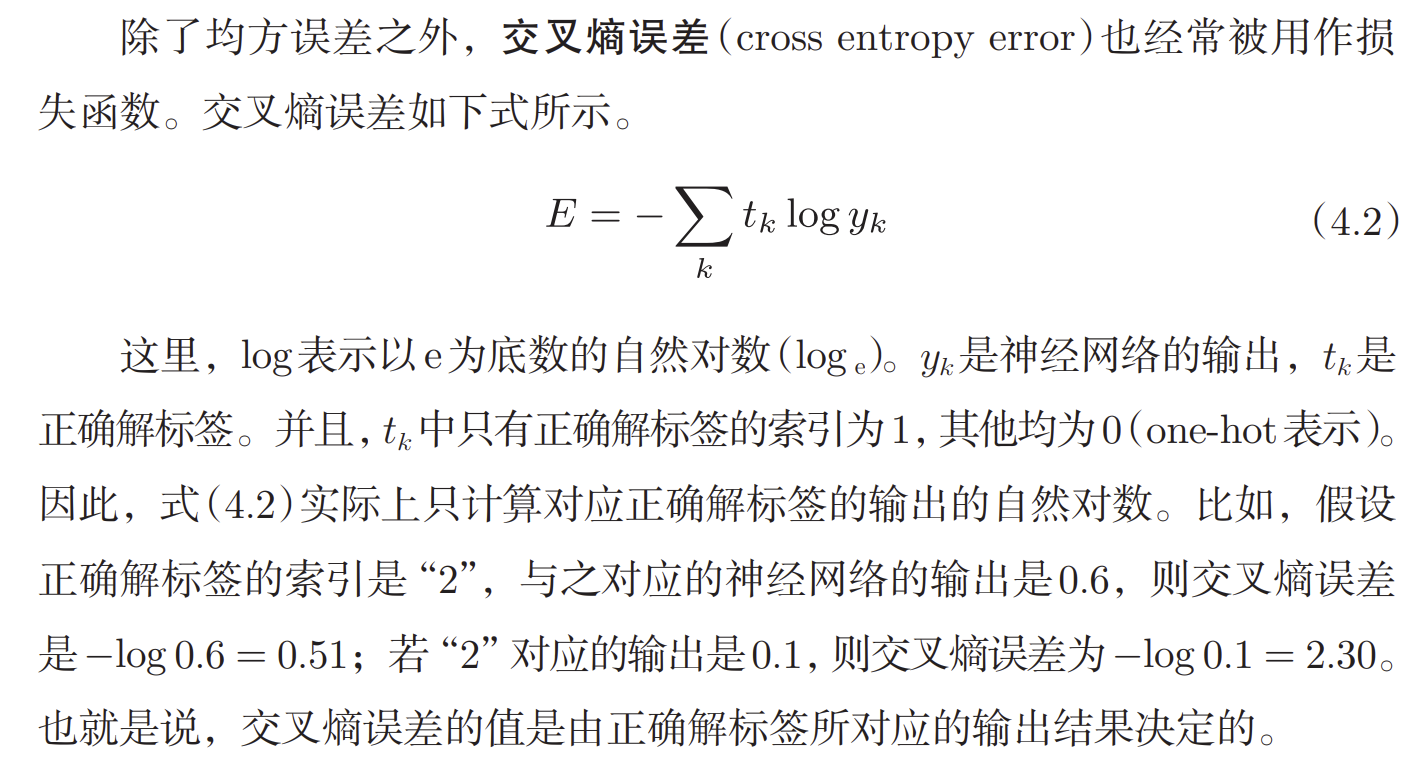

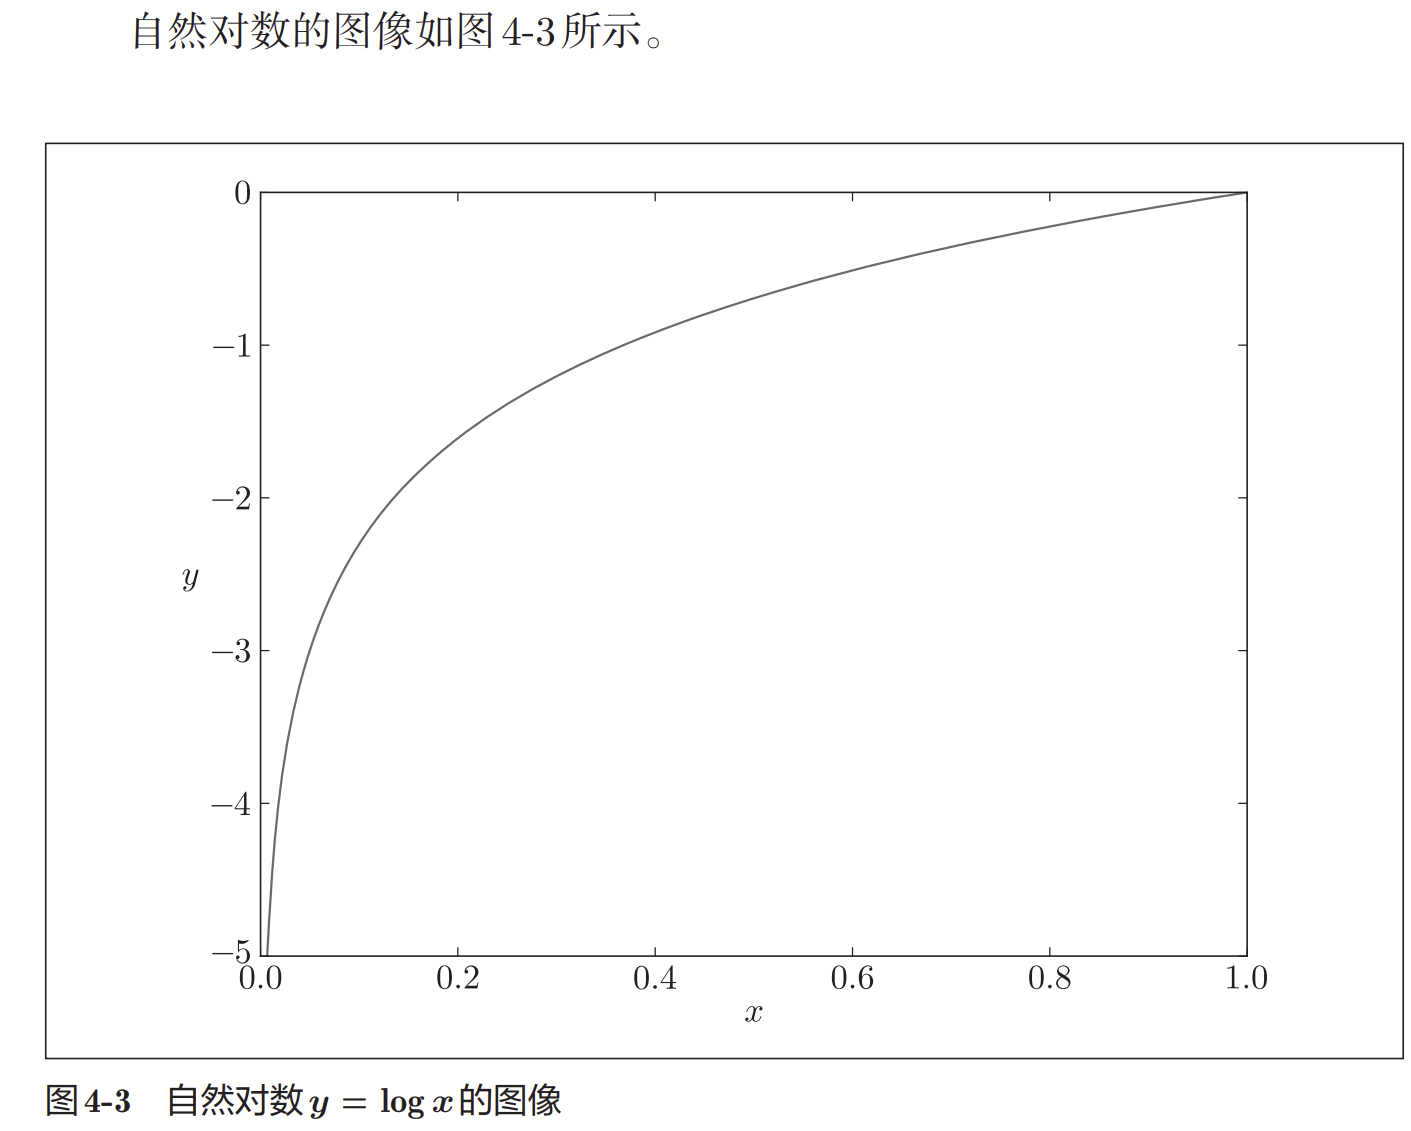

- x等于1时，y为0；随着x向0靠近，y逐渐变小。因此，正确解标签对应的输出越大，式（4.2）的值越接近0；当输出为1时，交叉熵误差为0。此外，如果正确解标签对应的输出较小，则式（4.2）的值较大。


In [10]:
 def cross_entropy_error(y, t):
        delta = 1e-7
        return -np.sum(t * np.log(y + delta))

- 函数内部在计算np.log时，加上了一个微小值delta。这是因为，当出现np.log(0)时，np.log(0)会变为负无限大的-inf，这样一来就会导致后续计算无法进行。作为保护性对策，添加一个微小值可以防止负无限大的发生

In [15]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [16]:
cross_entropy_error(np.array(y1), np.array(t))

2.3025840929945454

# mini-batch学习

- 如果要求所有训练数据的损失函数的总和，以交叉熵误差为例，可以写成下面的公式：

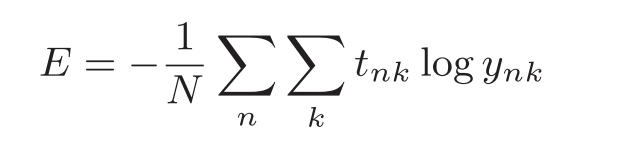

- 这里,假设数据有$N$个，$t_{nk}$表示第$n$个数据的第k个元素的值（$y_{nk}$是神经网络的输出，$t_{nk}$是监督数据）。式子虽然看起来有一些复杂，其实只是把单个数据的损失函数的式（4.2）扩大到了N份数据，不过最后还要除以N进行正规化。通过除以N，可以求单个数据的“平均损失函数”。通过这样的平均化，可以获得和训练数据的数量无关的统一指标。比如，即便训练数据有1000个或10000个，也可以求得单个数据的平均损失函数

- 另外，MNIST数据集的训练数据有60000个，如果以全部数据为对象求损失函数的和，则计算过程需要花费较长的时间。再者，如果遇到大数据，数据量会有几百万、几千万之多，这种情况下以全部数据为对象计算损失函数是不现实的。因此，我们从全部数据中选出一部分，作为全部数据的“近似”。神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。比如，从60000个训练数据中随机选择100笔，再用这100笔数据进行学习。这种学习方式称为**mini-batch学习**。

- mini-batch的损失函数也是利用一部分样本数据来近似地计算整体。也就是说，用随机选择的小批量数据（mini-batch）作为全体训练数据的近似值。


In [17]:
import numpy as np

from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [19]:
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [22]:
x_batch.shape

(10, 784)

In [23]:
t_batch.shape

(10, 10)

In [25]:
# np.random.choice(60000, 10)会从0到59999之间随机选择10个数字
np.random.choice(6000, 10)

array([3158, 5386, 5422, 5184, 5234, 4910,  830, 2370, 3581,  154])

In [34]:
# 可以同时处理单个数据和批量数据两种情况的函数

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error_2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size, t)] + 1e-7)) / batch_size

In [28]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [29]:
y

[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [30]:
t

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [32]:
t_lable = [2, 7, 0, 9, 4]
t_lable

[2, 7, 0, 9, 4]

In [35]:
y[np.arange(5), np.array(t_lable)]

TypeError: list indices must be integers or slices, not tuple

# 为什么要设定损失函数

- 在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。**为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，逐步更新参数的值**

- 假设有一个神经网络，现在我们来关注这个神经网络中的某一个权重参数。此时，对该权重参数的损失函数求导，表示的是“如果稍微改变这个权重参数的值，损失函数的值会如何变化”。**如果导数的值为负，通过使该权重参数向正方向改变，可以减小损失函数的值；反过来，如果导数的值为正，则通过使该权重参数向负方向改变，可以减小损失函数的值。**不过，当导数的值为0时，无论权重参数向哪个方向变化，损失函数的值都不会改变，此时该权重参数的更新会停在此处

- 在进行神经网络的学习时，不能将识别精度作为指标。因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0

### 为什么用识别精度作为指标时，参数的导数在绝大多数地方都会变成0？

- 假设某个神经网络正确识别出了100笔训练数据中的32笔，此时识别精度为32 %。如果以识别精度为指标，即使稍微改变权重参数的值，识别精度也仍将保持在32 %，不会出现变化。也就是说，仅仅微调参数，是无法改善识别精度的。即便识别精度有所改善，它的值也不会像32.0123 ... %这样连续变化，而是变为33 %、34 %这样的不连续的、离散的值。而如果把损失函数作为指标，则当前损失函数的值可以表示为0.92543 ... 这样的值。并且，如果稍微改变一下参数的值，对应的损失函数也会像0.93432 ... 这样发生连续性的变化。

- 识别精度对微小的参数变化基本上没有什么反应，即便有反应，它的值也是不连续地、突然地变化。作为激活函数的阶跃函数也有同样的情况。出于相同的原因，如果使用阶跃函数作为激活函数，神经网络的学习将无法进行


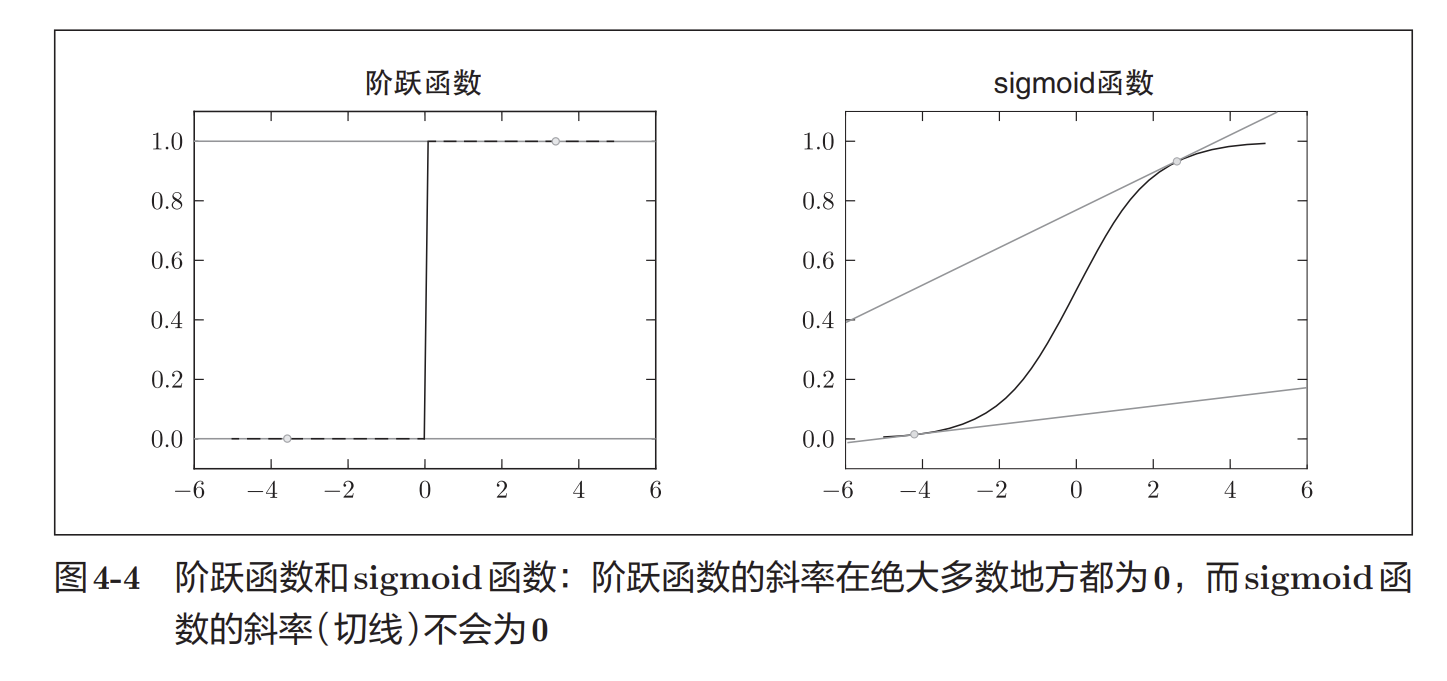

# 数值微分

- 导数
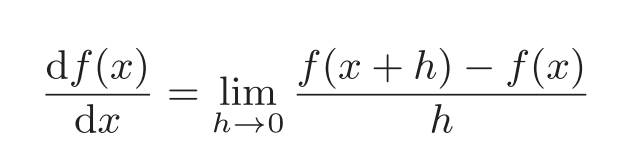

- 差分
    - 数值微分含有误差。为了减小这个误差，我们可以计算函数f在(x + h)和(x − h)之间的差分。因为这种计算方法以x为中心，计算它左右两边的差分，所以也称为中心差分（而(x + h)和x之间的差分称为前向差分）。
    
    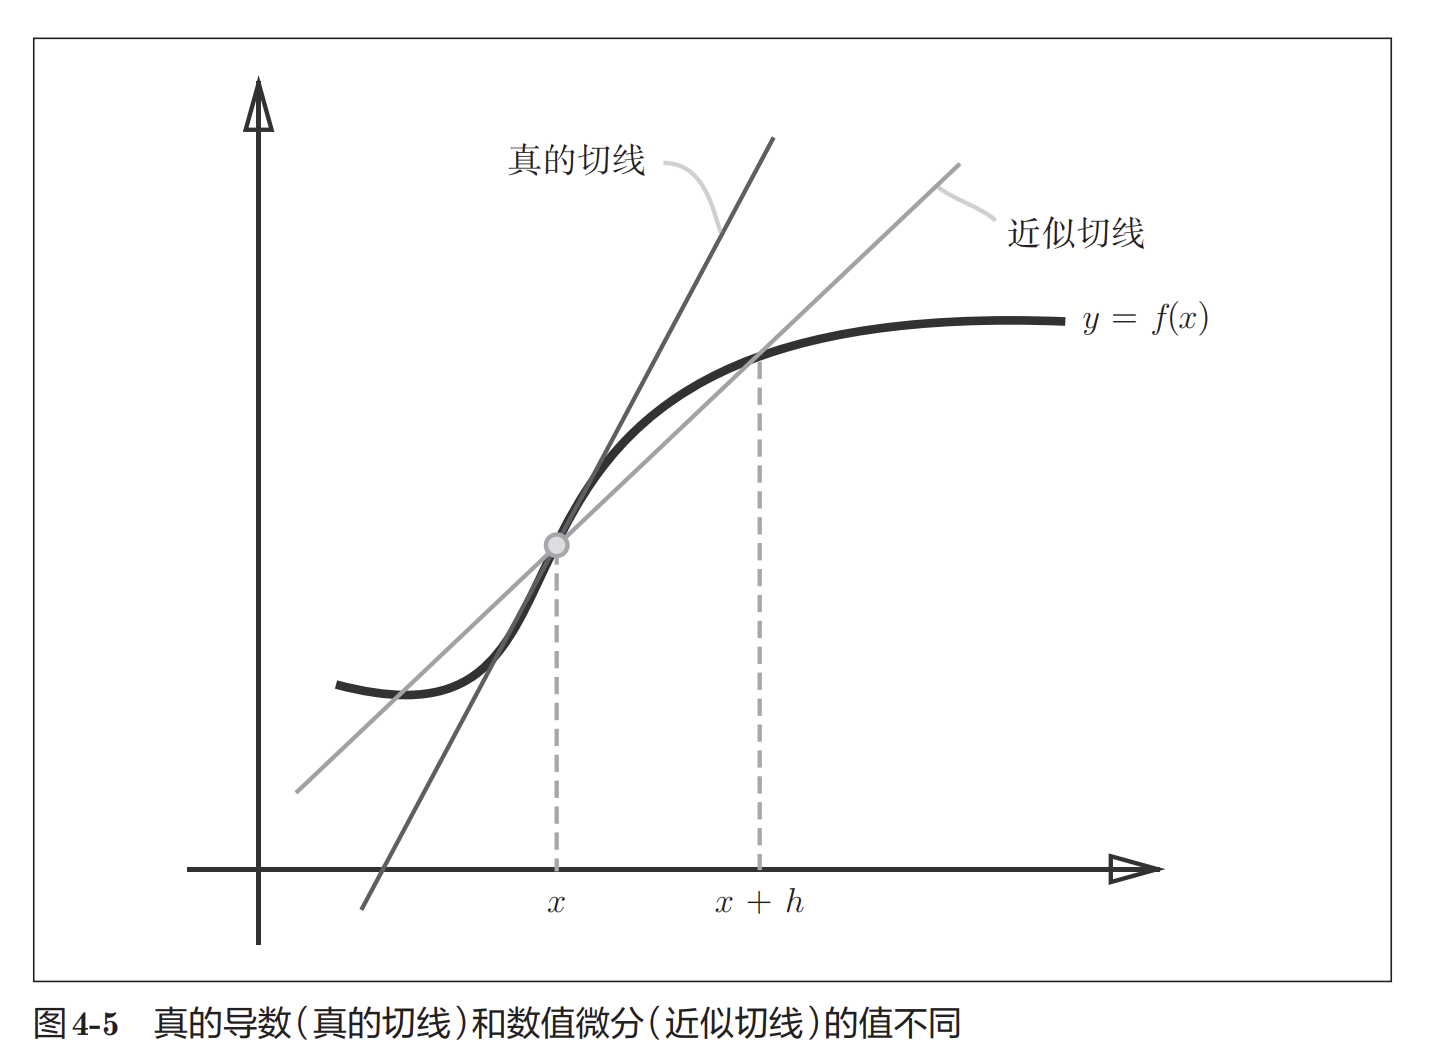
   
- 利用微小的差分求导数的过程称为数值微分（numerical differentiation）。而基于数学式的推导求导数的过程，则用“解析性”（analytic）一词，称为“解析性求解”或者“解析性求导”。比如，$y = x^2$的导数，可以通过$\frac{d_y}{d_x} = 2x$解析性地求解出来。因此，当$x = 2$时，y的导数为4。解析性求导得到的导数是不含误差的“真的导数”。

In [36]:
# 数值微分

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

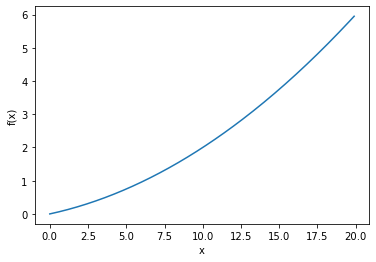

In [37]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [38]:
numerical_diff(function_1, 5)

0.1999999999990898

In [39]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


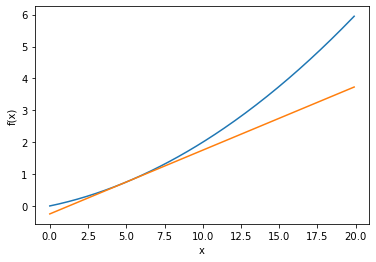

In [44]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# tangent_line的解释

- 这里的曲线方程是$f(x) = 0.01x^2 + 0.1x$，要绘制在x=5这一点的曲线的切线$y = kx + b$，需要计算该切线的斜率k和截距b。函数$numerical_diff(f, x)$返回的就是函数f在x处的切线斜率，不过这里用的是微分法，也就是取一个很小的dx，计算dy，斜率k就等于$dy/dx$。有了斜率，函数tangent_line计算截距b之后，返回了lambda函数，该lambda函数返回的就是$kx+b$。

/home/sutaoyu/miniconda3/envs/predict_missing_data/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  # Remove the CWD from sys.path while we load stuff.


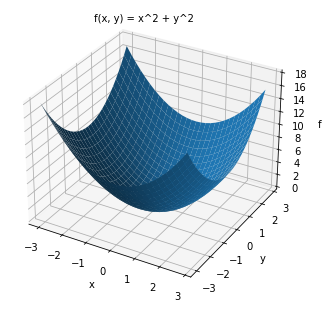

In [57]:
from matplotlib import pyplot as plt
import numpy as np
# 导入可以创建三维坐标的库
from mpl_toolkits.mplot3d import Axes3D
# 设置字体，使可以输入中文
plt.rcParams['font.sans-serif']=['STSong']
# 绘制三维坐标
# 创建一个新的matplotlib.figure.Figure并为其添加一个类型为Axes3D的新轴
fig = plt.figure()
ax = Axes3D(fig)
# 生成数据
x = np.arange(-3, 3, 0.2)  # 从-3到3单位间隔为0.2
y = np.arange(-3, 3, 0.2)  # 从-3到3单位间隔为0.2
x, y = np.meshgrid(x, y)  # 初始散点数据处理成xy网格数据
def fun(x, y):  # 定义函数
    f = x**2 + y**2  # 计算函数式
    return f
f = fun(x, y)  # 函数调用
# 绘制函数图像
ax.set_xlabel('x')  # x轴
ax.set_ylabel('y')  # y轴
ax.set_zlabel('f')  # f轴
# 标题名称、位置：0左下，1右上
ax.text2D(0.3, 0.95, "f(x, y) = x^2 + y^2", transform=ax.transAxes)
ax.plot_surface(x, y, f)
plt.show()


# 偏导数

- 有多个变量的函数的导数称为偏导数

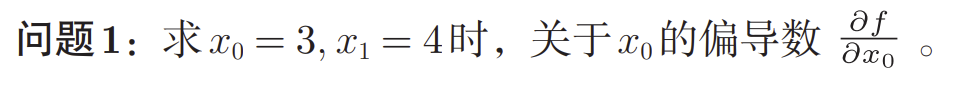

In [58]:
def function_tmp1(x0):
    return x0*x0 + 4.0*4.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

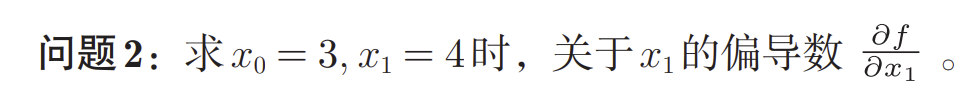

In [59]:
def funtion_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(funtion_tmp2, 4.0)

7.999999999999119

# 梯度

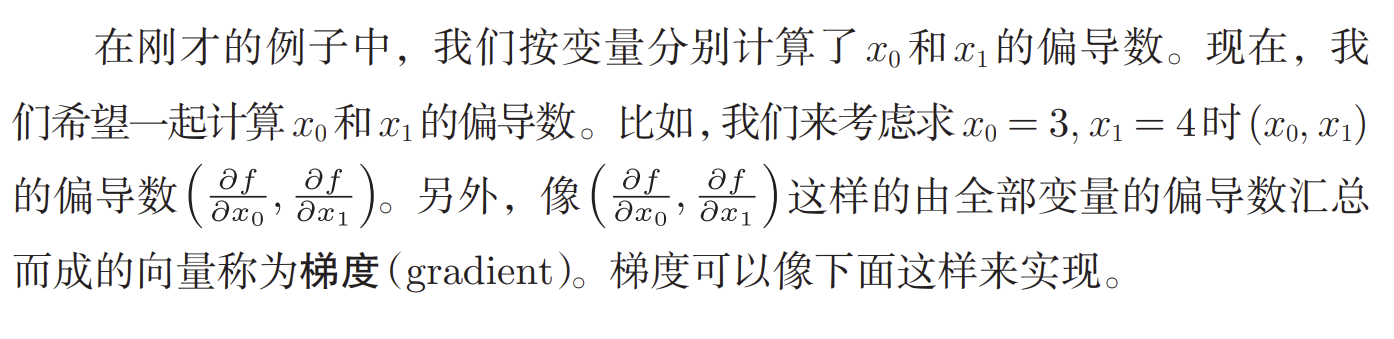

In [66]:
def numerical_gradient(f, x):
    h = 1e-4
    # 生成与x形状相同的数组
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad


def function_2(x):
    return x[0]**2 + x[1]**2

print(numerical_gradient(function_2, np.array([3.0, 4.0])))

[6. 8.]


In [67]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [68]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

# 绘制梯度

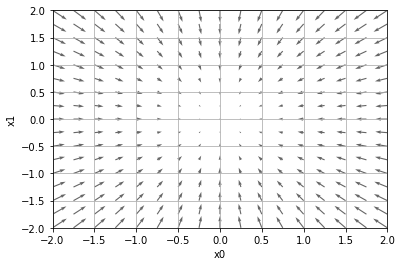

In [101]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 恢复原来的值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        # 先初始化一个同样形状的数组
        grad = np.zeros_like(X)
        
        # idx, x-> (0,[-2. -2.])
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    # 如果是一维数组
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    # flatten返回一个折叠成一维的数组
    X = X.flatten()
    Y = Y.flatten()

    # np.array([X, Y]).T 对[X, Y]进行转置，从2*N变成N*2
    # 得到结果之后将N*2的矩阵转置成2*N,便于绘制
    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    # 绘制箭头图
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

# 梯度重要性质
- 梯度指向了最低处，但并非任何时候都这样。**实际上，梯度会指向各点处的函数值降低的方向。更严格地讲，梯度指示的方向是各点处的函数值减小最多的方向**
- 高等数学告诉我们，$方向导数= cos(θ) × 梯度$（θ是方向导数的方向与梯度方向的夹角）。因此，所有的下降方向中，梯度方向下降最多。

# meshgrid()函数

[参考](https://wangyeming.github.io/2018/11/12/numpy-meshgrid/)
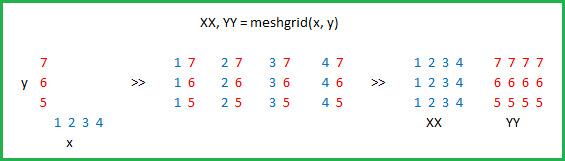


[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[7 7 7 7]
 [6 6 6 6]
 [5 5 5 5]]


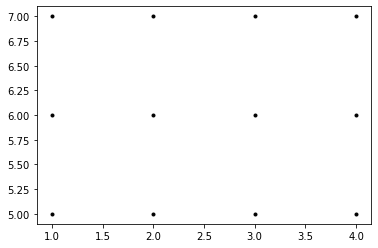

In [86]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 5)
y = np.arange(7, 4, -1)

xx, yy = np.meshgrid(x, y)

print(xx)
print(yy)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')
plt.show()

# quiver函数

[参考](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: STSong


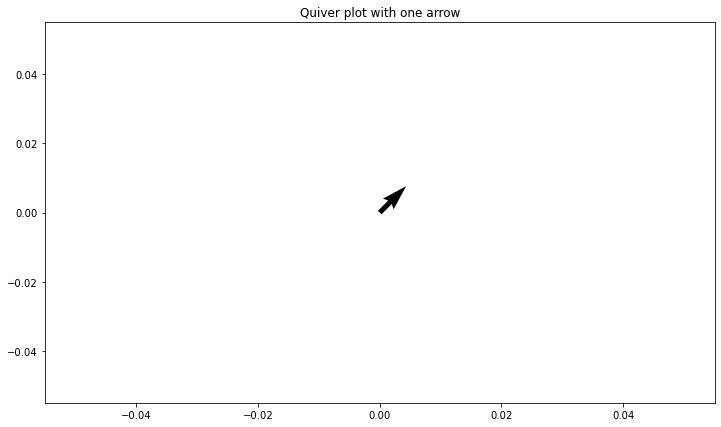

In [102]:
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating arrow
x_pos = 0
y_pos = 0
x_direct = 1
y_direct = 1
 
# Creating plot
fig, ax = plt.subplots(figsize = (12, 7))
ax.quiver(x_pos, y_pos, x_direct, y_direct)
ax.set_title('Quiver plot with one arrow')
 
# Show plot
plt.show()

# 梯度法

- 机器学习的主要任务是学习时寻找最优参数
- 同样，神经网络也必须在学习时找到最优参数（权重和偏置），这里所说的最优参数是指损失函数取最小值时的参数
- 但是，一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值，而通过巧妙的使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是**梯度法**
- 需要注意的是，梯度表示的是各点处的函数值减小最多的方向。因此，无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向。实际上，在复杂的函数中，梯度指示的方向基本上都不是函数值最小处。
- **函数的极小值、最小值以及被称为鞍点（saddle point）的地方，梯度为 0**。极小值是局部最小值，也就是限定在某个范围内的最小值。鞍点是从某个方向上看是极大值，从另一个方向上看则是极小值的点。虽然梯度法是要寻找梯度为 0的地方，但是那个地方不一定就是最小值（也有可能是极小值或者鞍点）。此外，当函数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区，陷入被称为“学习高原”的无法前进的停滞期。
- 虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地减小函数的值。因此，在寻找函数的最小值（或者尽可能小的值）的位置的任务中，要以梯度的信息为线索，决定前进的方向。

## 定义
- 在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是**梯度法（gradient method）**。梯度法是解决机器学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用

- 根据目的是寻找最小值还是最大值，梯度法的叫法有所不同。严格地讲，**寻找最小值的梯度法称为梯度下降法（gradient descent method），寻找最大值的梯度法称为梯度上升法（gradient ascent method）**。但是通过反转损失函数的符号，求最小值的问题和求最大值的问题会变成相同的问题，因此“下降”还是“上升”的差异本质上并不重要。一般来说，神经网络（深度学习）中，梯度法主要是指梯度下降法



## 公式

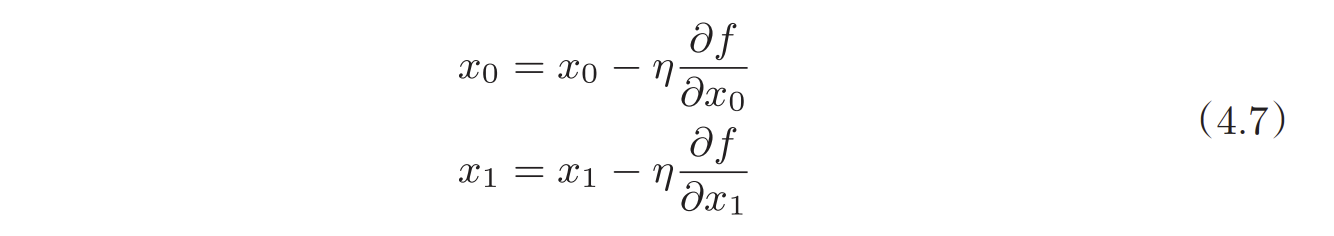

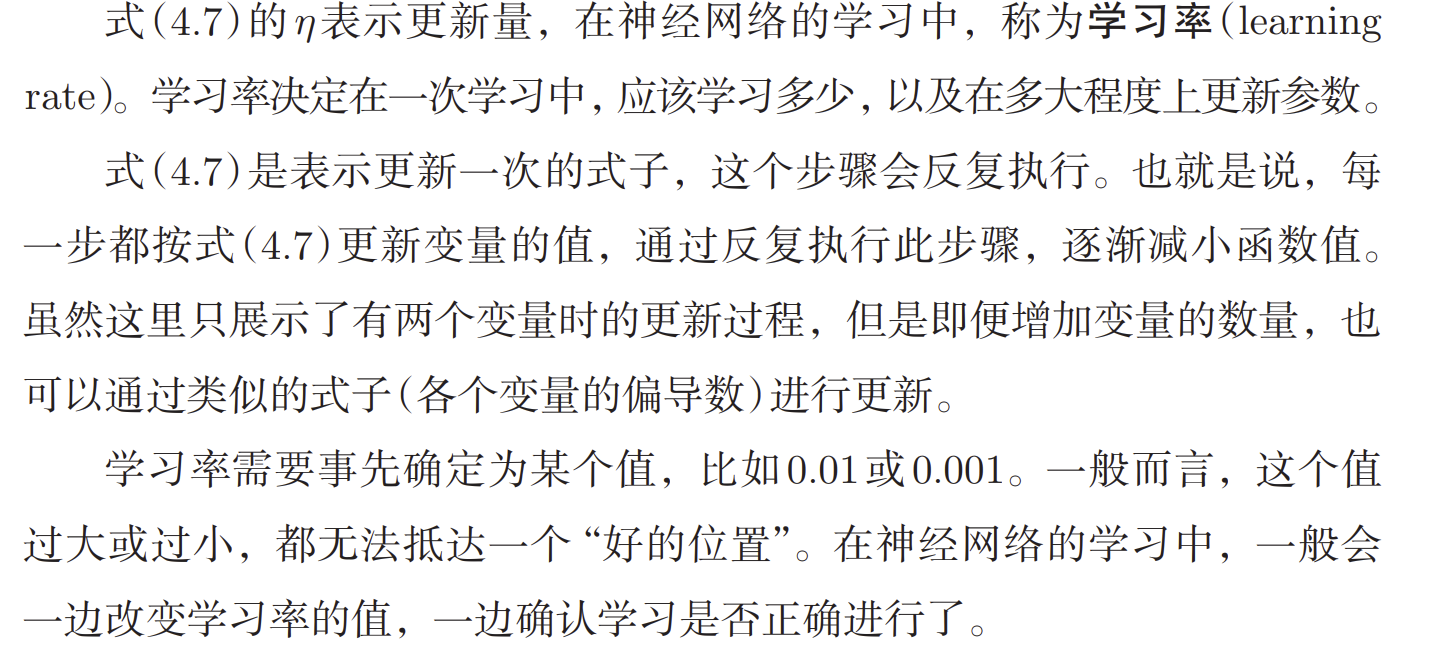
- 



In [112]:
# 参数f是要进行最优化的函数，init_x是初始值，lr是学习率learning 
# rate，step_num是梯度法的重复次数。numerical_gradient(f,x)会求函数的
# 梯度，用该梯度乘以学习率得到的值进行更新操作，由step_num指定重复的
# 次数

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [113]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

# 绘制梯度法更新过程

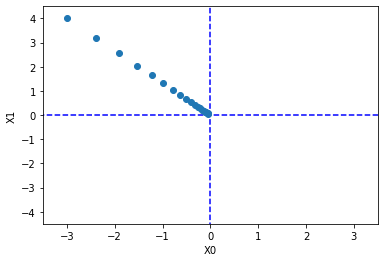

In [114]:
def gradient_descent_new(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_new(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 学习率过大或者过小

- 实验结果表明，学习率过大的话，会发散成一个很大的值；反过来，学习率过小的话，基本上没怎么更新就结束了。也就是说，设定合适的学习率是一个很重要的问题

In [117]:
# 学习率过大的例子：lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [118]:
# 学习率过小的例子：lr=1e-10
init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

# 超参数
- 像学习率这样的参数称为超参数。这是一种和神经网络的参数（权重和偏置）性质不同的参数。
- 相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利进行的设定